In [157]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

In [158]:
file_path = "D:/project/전국코로나데이터.csv"

In [159]:
corona_df = pd.read_csv(file_path, encoding='cp949')
corona_df

,일자,누적확진,신규확진,인구확진률,인구,누적사망,신규사망,사망률,누적 1차,누적백신,당일1차,당일2차,1차접종률,접종률,미접종자수
0,2022-05-23,17993985,26313,35.06,51329905,24006,19,0.13,45049534,44570419,471,732,87.76,86.83,6280371
1,2022-05-22,17967672,9975,35.00,51329905,23987,22,0.13,45049063,44569687,6,11,87.76,86.83,6280842
2,2022-05-21,17957697,19298,34.98,51329905,23965,54,0.13,45049057,44569676,530,772,87.76,86.83,6280848
3,2022-05-20,17938399,23442,34.95,51329905,23911,26,0.13,45048527,44568904,1138,1912,87.76,86.83,6281378
4,2022-05-19,17914957,25108,34.90,51329905,23885,43,0.13,45047389,44566992,508,842,87.76,86.82,6282516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2021-01-05,65818,839,0.13,51305184,1027,20,1.56,0,0,0,0,0.00,0.00,51305184
504,2021-01-04,64979,715,0.13,51305184,1007,26,1.55,0,0,0,0,0.00,0.00,51305184
505,2021-01-03,64264,1020,0.13,51305184,981,19,1.53,0,0,0,0,0.00,0.00,51305184
506,2021-01-02,63244,651,0.12,51305184,962,20,1.52,0,0,0,0,0.00,0.00,51305184


In [160]:
corona_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      508 non-null    object 
 1   누적확진    508 non-null    int64  
 2   신규확진    508 non-null    int64  
 3   인구확진률   508 non-null    float64
 4   인구      508 non-null    int64  
 5   누적사망    508 non-null    int64  
 6   신규사망    508 non-null    int64  
 7   사망률     508 non-null    float64
 8   누적 1차   508 non-null    int64  
 9   누적백신    508 non-null    int64  
 10  당일1차    508 non-null    int64  
 11  당일2차    508 non-null    int64  
 12  1차접종률   508 non-null    float64
 13  접종률     508 non-null    float64
 14  미접종자수   508 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 59.7+ KB


In [161]:
corona_df.isnull().sum()
# 데이터 정제를위한 결측값 측정

일자       0
누적확진     0
신규확진     0
인구확진률    0
인구       0
누적사망     0
신규사망     0
사망률      0
누적 1차    0
누적백신     0
당일1차     0
당일2차     0
1차접종률    0
접종률      0
미접종자수    0
dtype: int64

In [162]:
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df
scale_columns = ['누적확진', '신규확진', '인구확진률', '인구', '누적사망', '신규사망', '사망률', '누적 1차', '누적백신',
       '당일1차', '당일2차', '1차접종률', '접종률', '미접종자수',]
corona_df = standard_scaling(corona_df, scale_columns)
corona_df
# 각각의 평균을 표준편차로 나눈 값은 수렴한다


,일자,누적확진,신규확진,인구확진률,인구,누적사망,신규사망,사망률,누적 1차,누적백신,당일1차,당일2차,1차접종률,접종률,미접종자수
0,2022-05-23,2.928100,-0.102496,2.928564,1.596065,2.957366,-0.318452,-1.614673,1.019666,1.163292,-0.521218,-0.524195,1.019045,1.162870,-1.019102
1,2022-05-22,2.923114,-0.288837,2.922728,1.596065,2.954343,-0.282334,-1.614673,1.019641,1.163254,-0.523968,-0.528540,1.019045,1.162870,-1.019077
2,2022-05-21,2.921224,-0.182505,2.920782,1.596065,2.950842,0.102927,-1.614673,1.019641,1.163254,-0.520869,-0.523954,1.019045,1.162870,-1.019077
3,2022-05-20,2.917567,-0.135241,2.917864,1.596065,2.942249,-0.234176,-1.614673,1.019612,1.163214,-0.517273,-0.517084,1.019045,1.162870,-1.019048
4,2022-05-19,2.913125,-0.116239,2.913001,1.596065,2.938112,-0.029506,-1.614673,1.019552,1.163115,-0.520999,-0.523533,1.019045,1.162606,-1.018988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2021-01-05,-0.469136,-0.393037,-0.468972,-0.625308,-0.699163,-0.306412,1.043902,-1.378648,-1.134381,-0.524003,-0.528607,-1.378785,-1.134473,1.378794
504,2021-01-04,-0.469295,-0.394451,-0.468972,-0.625308,-0.702345,-0.234176,1.025310,-1.378648,-1.134381,-0.524003,-0.528607,-1.378785,-1.134473,1.378794
505,2021-01-03,-0.469430,-0.390972,-0.468972,-0.625308,-0.706483,-0.318452,0.988127,-1.378648,-1.134381,-0.524003,-0.528607,-1.378785,-1.134473,1.378794
506,2021-01-02,-0.469624,-0.395181,-0.469945,-0.625308,-0.709506,-0.306412,0.969536,-1.378648,-1.134381,-0.524003,-0.528607,-1.378785,-1.134473,1.378794


In [163]:
corona_df = corona_df.corr()
corona_df

,누적확진,신규확진,인구확진률,인구,누적사망,신규사망,사망률,누적 1차,누적백신,당일1차,당일2차,1차접종률,접종률,미접종자수
누적확진,1.000000,0.505474,1.000000,0.703514,0.978860,0.634460,-0.705592,0.464850,0.526810,-0.225082,-0.220308,0.464637,0.526649,-0.464607
신규확진,0.505474,1.000000,0.505457,0.615194,0.497951,0.886474,-0.588875,0.399763,0.454739,-0.194387,-0.192092,0.399571,0.454596,-0.399548
인구확진률,1.000000,0.505457,1.000000,0.703505,0.978860,0.634454,-0.705595,0.464856,0.526814,-0.225069,-0.220302,0.464643,0.526652,-0.464613
인구,0.703514,0.615194,0.703505,1.000000,0.801029,0.626745,-0.733973,0.632473,0.718388,-0.308853,-0.280264,0.632160,0.718148,-0.632117
누적사망,0.978860,0.497951,0.978860,0.801029,1.000000,0.622856,-0.777859,0.585967,0.653793,-0.254157,-0.230946,0.585743,0.653628,-0.585712
신규사망,0.634460,0.886474,0.634454,0.626745,0.622856,1.000000,-0.638387,0.476395,0.542307,-0.227447,-0.207164,0.476225,0.542192,-0.476202
사망률,-0.705592,-0.588875,-0.705595,-0.733973,-0.777859,-0.638387,1.000000,-0.915598,-0.891430,0.080921,-0.078398,-0.915517,-0.891382,0.915506
누적 1차,0.464850,0.399763,0.464856,0.632473,0.585967,0.476395,-0.915598,1.000000,0.968486,-0.087964,0.167153,1.000000,0.968517,-1.000000
누적백신,0.526810,0.454739,0.526814,0.718388,0.653793,0.542307,-0.891430,0.968486,1.000000,-0.234588,0.013279,0.968430,1.000000,-0.968423
당일1차,-0.225082,-0.194387,-0.225069,-0.308853,-0.254157,-0.227447,0.080921,-0.087964,-0.234588,1.000000,0.463719,-0.087828,-0.234521,0.087813


C:\Users\cys97\AppData\Local\Temp\ipykernel_19528\2639034138.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corona_df, dtype=np.bool)
c:\Users\cys97\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\cys97\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


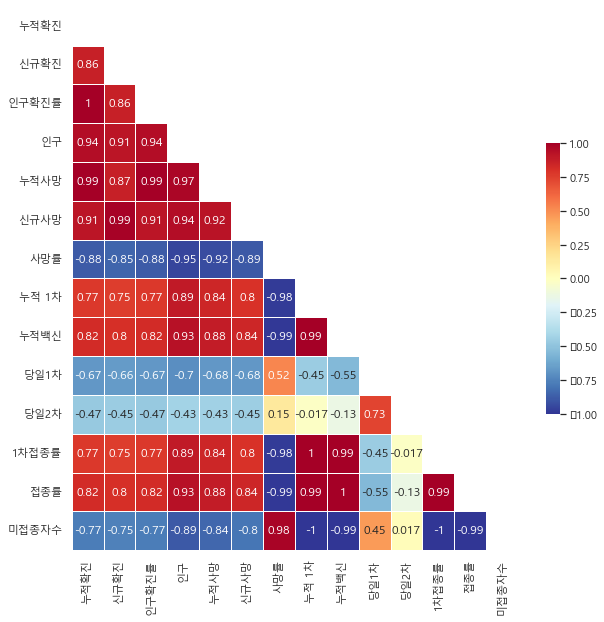

In [164]:
corona_df = corona_df.corr()
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corona_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corona_df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = - 1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  

In [165]:
info_df = corona_df[['접종률','사망률','누적사망','인구확진률']]

In [166]:
type(info_df)
info_df

,접종률,사망률,누적사망,인구확진률
누적확진,0.819672,-0.879944,0.992792,1.000000
신규확진,0.799241,-0.845274,0.866269,0.862189
인구확진률,0.819675,-0.879947,0.992793,1.000000
인구,0.926848,-0.946831,0.971580,0.944557
누적사망,0.879057,-0.923732,1.000000,0.992793
신규사망,0.841713,-0.885723,0.916288,0.911176
사망률,-0.986204,1.000000,-0.923732,-0.879947
누적 1차,0.993393,-0.978607,0.837143,0.772438
누적백신,1.000000,-0.986219,0.879126,0.819756
당일1차,-0.546550,0.521281,-0.675159,-0.672681


In [167]:
corona_df.columns = corona_df.columns.str.replace(' ', '')


In [168]:
info_df = corona_df.loc[['인구확진률', '누적사망','사망률','접종률'],  ['접종률','사망률','누적사망','인구확진률']]
info_df

,접종률,사망률,누적사망,인구확진률
인구확진률,0.819675,-0.879947,0.992793,1.000000
누적사망,0.879057,-0.923732,1.000000,0.992793
사망률,-0.986204,1.000000,-0.923732,-0.879947
접종률,1.000000,-0.986204,0.879057,0.819675


In [119]:
info_df.loc['사망률','접종률']

-0.986204227808183

In [120]:
print(info_df.columns)

Index(['접종률', '사망률', '누적사망', '인구확진률'], dtype='object')


In [121]:
info2_df = corona_df.loc['사망률','접종률']
info2_df

-0.986204227808183

c:\Users\cys97\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\cys97\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


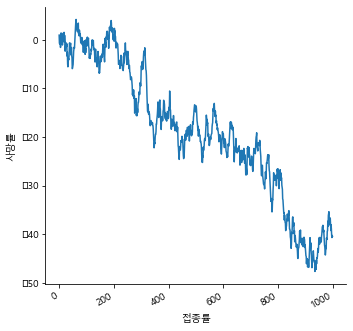

In [137]:
info2_df = pd.DataFrame(dict(접종률=np.arange(1000),
                       사망률=np.random.randn(1000).cumsum()))
g = sns.relplot(x="접종률", y="사망률", kind="line", data=info2_df)
g.fig.autofmt_xdate()

In [82]:
corona_df.describe()


,누적확진,신규확진,인구확진률,인구,누적사망,신규사망,사망률,누적1차,누적백신,당일1차,당일2차,1차접종률,접종률,미접종자수
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.435487,0.420236,0.435488,0.454787,0.450362,0.437741,-0.474729,0.453840,0.458604,-0.239720,-0.078947,0.453815,0.458591,-0.453812
std,0.753477,0.728492,0.753477,0.793257,0.775009,0.756851,0.772263,0.740815,0.765952,0.618233,0.458132,0.740759,0.765920,0.740752
min,-0.879944,-0.845274,-0.879947,-0.946831,-0.923732,-0.885723,-0.986219,-1.000000,-0.993352,-0.704954,-0.473149,-1.000000,-0.993368,-1.000000
25%,-0.161784,-0.152377,-0.161777,-0.098473,-0.114070,-0.140753,-0.970635,0.175586,0.104794,-0.672686,-0.447588,0.175703,0.104877,-0.966315
50%,0.819713,0.799277,0.819716,0.916988,0.872663,0.841747,-0.882835,0.784391,0.830769,-0.546593,-0.126645,0.784275,0.830694,-0.784259
75%,0.936212,0.865250,0.936211,0.942981,0.957757,0.915011,-0.102564,0.966363,0.976744,0.227186,0.008414,0.966320,0.976740,-0.175719
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
datetimeIndex = pd.DatetimeIndex(corona_df['일자'])
datetimeIndex

DatetimeIndex(['2022-05-23', '2022-05-22', '2022-05-21', '2022-05-20',
               '2022-05-19', '2022-05-18', '2022-05-17', '2022-05-16',
               '2022-05-15', '2022-05-14',
               ...
               '2021-01-10', '2021-01-09', '2021-01-08', '2021-01-07',
               '2021-01-06', '2021-01-05', '2021-01-04', '2021-01-03',
               '2021-01-02', '2021-01-01'],
              dtype='datetime64[ns]', name='일자', length=508, freq=None)

In [7]:
datetimeIndex.year

Int64Index([2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='일자', length=508)

In [8]:
datetimeIndex.month

Int64Index([5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='일자', length=508)

In [9]:
datetimeIndex.day

Int64Index([23, 22, 21, 20, 19, 18, 17, 16, 15, 14,
            ...
            10,  9,  8,  7,  6,  5,  4,  3,  2,  1],
           dtype='int64', name='일자', length=508)

In [10]:

corona_df['month'] = pd.DatetimeIndex(corona_df['일자']).month
new_df = corona_df.groupby('month').mean()

print(new_df)

           누적확진      신규확진     인구확진률        인구      누적사망      신규사망       사망률  \
month                                                                         
1     -0.407162 -0.357439 -0.407192  0.485379 -0.263112 -0.225826  0.552128   
2     -0.309086  0.090459 -0.309090  0.485379 -0.162006 -0.207947  0.272689   
3      0.305633  1.458306  0.305602  0.485379  0.214183  1.113073 -0.100971   
4      1.040424  0.342322  1.040449  0.485379  0.911406  0.733190 -0.267724   
5      0.960760 -0.247049  0.960726  0.320833  0.907886 -0.265612 -0.216529   
6     -0.453279 -0.396172 -0.453248 -0.625308 -0.545443 -0.523924  0.623115   
7     -0.448020 -0.387130 -0.448013 -0.625308 -0.535490 -0.517296  0.310440   
8     -0.438571 -0.382864 -0.438600 -0.625308 -0.515096 -0.471857 -0.063788   
9     -0.428159 -0.379670 -0.428120 -0.625308 -0.482323 -0.464931 -0.277949   
10    -0.416897 -0.383249 -0.416888 -0.625308 -0.438249 -0.407000 -0.402032   
11    -0.404839 -0.369924 -0.404776 -0.625308 -0.354

                            OLS Regression Results                            
Dep. Variable:                    사망률   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1957.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          5.10e-176
Time:                        02:36:33   Log-Likelihood:                -318.34
No. Observations:                 508   AIC:                             640.7
Df Residuals:                     506   BIC:                             649.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.73e-16      0.020  -1.36e-14      1.0

Text(0, 0.5, 'Death rate')

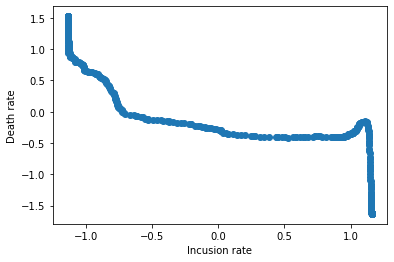

In [14]:
model = smf.ols(formula = '사망률 ~ 접종률', data = corona_df)
result = model.fit()

print(result.summary())

접종률 = corona_df['접종률'].tolist()
사망률 = corona_df['사망률'].tolist()
body = pd.DataFrame(
    {'사망률': 사망률, '접종률': 접종률}
)

plt.scatter(body['접종률'], body['사망률'])
plt.xlabel('Incusion rate')
plt.ylabel('Death rate')


C:\Users\cys97\AppData\Local\Temp\ipykernel_10464\1274413586.py:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


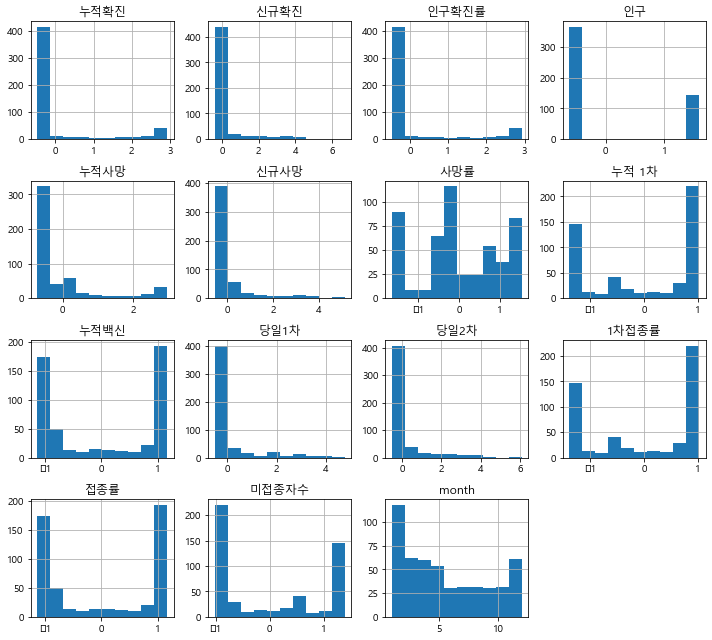

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

corona_df.hist(figsize=(10, 9))
plt.tight_layout()
plt.show()

C:\Users\cys97\AppData\Local\Temp\ipykernel_10464\1144765955.py:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


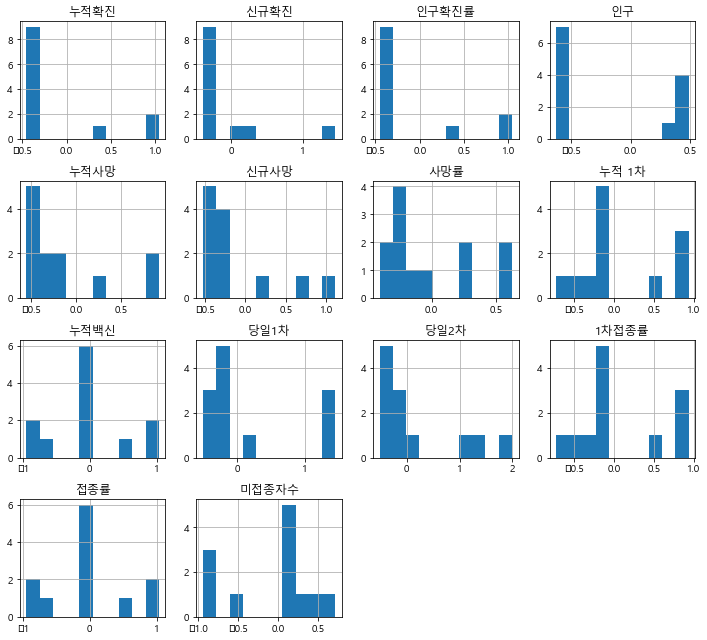

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

new_df.hist(figsize=(10, 9))
plt.tight_layout()
plt.show()
